In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10

In [2]:
(x_trainval, y_trainval), (x_test, y_test) = cifar10.load_data()

print('Train shape:', x_trainval.shape, y_trainval.shape)
print('Test shape:', x_test.shape, y_test.shape)

Train shape: (50000, 32, 32, 3) (50000, 1)
Test shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

print(f"Train: {x_train.shape}, Val: {x_val.shape}, Test: {x_test.shape}")

Train: (40000, 32, 32, 3), Val: (10000, 32, 32, 3), Test: (10000, 32, 32, 3)


In [33]:
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
import matplotlib.pyplot as plt

def plot_train_val_loss(history, title="Training & Validation Loss"):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1/10


/Users/williamglory/Desktop/IF SEM 6/ML/Tubes-2-IF3270/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-28 23:45:01.718697: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newe

625/625 - 13s - 21ms/step - accuracy: 0.4033 - f1_score: 0.1956 - loss: 1.7321 - val_accuracy: 0.5316 - val_f1_score: 0.1953 - val_loss: 1.3290
Epoch 2/10
625/625 - 13s - 20ms/step - accuracy: 0.5862 - f1_score: 0.1956 - loss: 1.1603 - val_accuracy: 0.6247 - val_f1_score: 0.1956 - val_loss: 1.0700
Epoch 3/10
625/625 - 13s - 20ms/step - accuracy: 0.6457 - f1_score: 0.1956 - loss: 0.9931 - val_accuracy: 0.6293 - val_f1_score: 0.1954 - val_loss: 1.0698
Epoch 4/10
625/625 - 13s - 21ms/step - accuracy: 0.6837 - f1_score: 0.1956 - loss: 0.8883 - val_accuracy: 0.6570 - val_f1_score: 0.1957 - val_loss: 1.0037
Epoch 5/10
625/625 - 13s - 21ms/step - accuracy: 0.7161 - f1_score: 0.1956 - loss: 0.8026 - val_accuracy: 0.6588 - val_f1_score: 0.1957 - val_loss: 1.0659
Epoch 6/10
625/625 - 13s - 20ms/step - accuracy: 0.7431 - f1_score: 0.1956 - loss: 0.7294 - val_accuracy: 0.6482 - val_f1_score: 0.1957 - val_loss: 1.0909
Epoch 7/10
625/625 - 13s - 20ms/step - accuracy: 0.7642 - f1_score: 0.1956 - loss

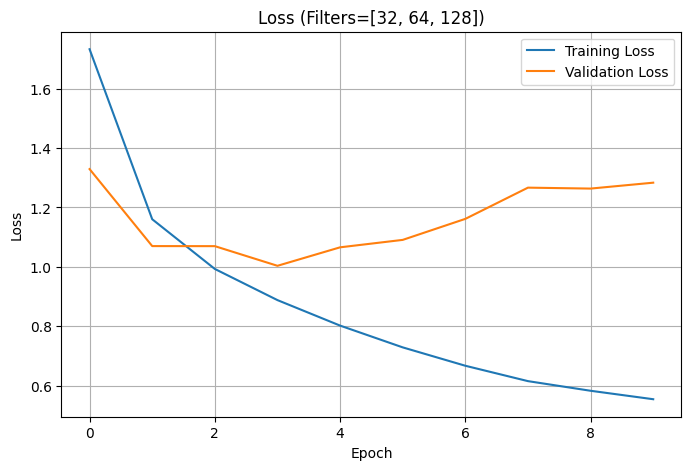

2025-05-28 23:46:57.539427: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-05-28 23:46:57.539674: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Test accuracy: 0.6664
Macro F1-Score pada test set (bawaan keras): 0.1956
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Macro F1-Score pada test set (library sklearn): 0.6638


In [5]:
import os
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras.optimizers import Adam

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

def build_model(input_shape, num_conv, filters, kernel_sizes, pooling_type='max'):
    model = Sequential()
    for i in range(num_conv):
        if i == 0:
            model.add(Conv2D(filters[i], kernel_sizes[i], activation='relu', input_shape=input_shape, padding='same'))
        else:
            model.add(Conv2D(filters[i], kernel_sizes[i], activation='relu', padding='same'))
        if pooling_type == 'max':
            model.add(MaxPooling2D((2,2)))
        else:
            model.add(AveragePooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

default_filters = [32, 64, 128]
default_kernel = [(3,3), (3,3), (3,3)]
default_pooling = 'max'

# Pengaruh Banyak Filter
number_filters = [32, 64, 128]

model = build_model(
    input_shape=(32,32,3),
    num_conv=3,
    filters=number_filters,
    kernel_sizes=default_kernel,
    pooling_type=default_pooling
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.F1Score(average='macro', name='f1_score')]
)
history = model.fit(
    x_train, y_train, epochs=10, batch_size=64,
    validation_data=(x_val, y_val), verbose=2
)
plot_train_val_loss(history, f"Loss (Filters={number_filters})")
test_loss, test_acc, test_f1 = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Macro F1-Score pada test set (bawaan keras): {test_f1:.4f}")

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()
macro_f1 = f1_score(y_true, y_pred, average='macro')
print(f"Macro F1-Score pada test set (library sklearn): {macro_f1:.4f}")

model.save_weights(f'weights_num_filters{"-".join(map(str, number_filters))}.weights.h5')